# Лабораторна робота № 7 
## Дослідження та візуалізація даних за допомогою Python 
## Мета: отримати базові навики використання Python для дослідження та візуалізації даних.
## Завдання:
1. Встановіть Jupyter notebook через pip або Anaconda Distribution. 
2. Завантажте russia_losses_equipment.csv файл з сайту Kaggle.com https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war 
3. Виберіть один варіант для цієї лабораторної роботи, використовуючи формулу N = ord("LLL") % 3 + 1, де N – це номер варіанту, LLL – це перша літера вашого прізвища.
4. Поради: 
* Використовуйте csv.reader()функцію для читання файлу csv. 
* Пропустіть перший рядок (із заголовками стовпців). 
* Не використовуйте цикли чи інші ітераційні конструкції для обробки масивів numpy. Використовуйте лише зрізи та/або універсальні (векторизовані) функції. 
* Створіть функції до завдань 3-7 кожного варіанта.
   
5. Вимоги до графіків: 
* встановити тип лінії (пунктирна, пунктирна тощо);  
* графіки повинні бути підписані; 
* додайте легенду;  
* додати сітку та вказати колір і тип ліній; 
* додайте назву графіку, позначки осей і значення но осях; 
* змінити розмір графіку (наприклад, 8x16 дюймів) і розподільну здатність (наприклад, 100 dpi); 
* зберегти графік у файл формату png.

### Варіант 3. Дослідження втрат бронетранспортерів (БТР). 
1. Створіть функцію, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця. 
2. Використовуючи функцію з попереднього завдання, створіть масив numpy зі значень стовпця «APC» (Armored personnel carrier). 
3. Знайдіть добові втрати БТР. 
4. Знайдіть 5 найбільших добових втрат БТР. 
5. Визначте, скільки БТР було знищено влітку 2024 року. 
6. Знайдіть середнє значення знищених БТР за 100-500 днів війни. 
7. Створіть графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

In [40]:
N = ord("Y") % 3 + 1

In [41]:
print('Варіант: ', N)

Варіант:  3


## Імпорт бібліотек та імпорт модулів

In [42]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
filename = 'russia_losses_equipment.csv'

# Функція, яка приймає назву файлу та назву стовпця як параметр та повертає масив numpy зі значеннями стовпця.

In [43]:
def get_column_data(filename, column_name):
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile)
        headers = next(reader)

        column_index = headers.index(column_name)

        if column_name.lower() == "date":
            data = np.array([datetime.strptime(row[column_index], "%Y-%m-%d") for row in reader])
        else:
            data = np.array([int(row[column_index]) for row in reader])
    
    return data

## Виклик та вивід get_column_data

In [44]:
apc_data = get_column_data(filename, "APC")

print(apc_data)


[18355 18332 18287 18254 18229 18199 18175 18111 18072 18053 18002 17969
 17939 17895 17876 17827 17800 17765 17751 17740 17710 17679 17658 17627
 17596 17579 17547 17503 17476 17438 17396 17344 17304 17292 17252 17222
 17170 17132 17093 17080 17077 17071 17063 17043 17003 16955 16938 16925
 16906 16897 16878 16878 16869 16848 16821 16786 16760 16736 16722 16699
 16681 16667 16648 16631 16620 16599 16567 16542 16521 16495 16480 16473
 16461 16426 16402 16385 16368 16363 16350 16341 16332 16323 16294 16286
 16255 16238 16211 16203 16161 16141 16103 16095 16074 16050 16039 16013
 16000 15980 15963 15917 15902 15883 15871 15862 15826 15811 15779 15755
 15732 15715 15704 15685 15645 15629 15611 15600 15583 15566 15550 15524
 15505 15480 15459 15450 15431 15413 15398 15383 15372 15337 15319 15307
 15287 15269 15263 15234 15208 15187 15176 15144 15131 15105 15096 15076
 15036 15020 15002 14980 14947 14935 14913 14891 14858 14818 14803 14786
 14775 14748 14721 14699 14665 14630 14595 14552 14


# Функція для розрахунку добових втрат БТР

In [45]:
def daily_losses(data):
    losses = np.diff(data)
    daily_losses = np.abs(losses)
    
    return daily_losses

## Виклик та вивід daily_losses

In [46]:
apc_data = get_column_data(filename, "APC")
apc_daily_losses = daily_losses(apc_data)

print("Добові втрати БТР:", apc_daily_losses)

Добові втрати БТР: [ 23  45  33  25  30  24  64  39  19  51  33  30  44  19  49  27  35  14
  11  30  31  21  31  31  17  32  44  27  38  42  52  40  12  40  30  52
  38  39  13   3   6   8  20  40  48  17  13  19   9  19   0   9  21  27
  35  26  24  14  23  18  14  19  17  11  21  32  25  21  26  15   7  12
  35  24  17  17   5  13   9   9   9  29   8  31  17  27   8  42  20  38
   8  21  24  11  26  13  20  17  46  15  19  12   9  36  15  32  24  23
  17  11  19  40  16  18  11  17  17  16  26  19  25  21   9  19  18  15
  15  11  35  18  12  20  18   6  29  26  21  11  32  13  26   9  20  40
  16  18  22  33  12  22  22  33  40  15  17  11  27  27  22  34  35  35
  43  14  30  48  43  42  22  40  32  35  19  14  34  23  27  33  29  21
  39  16  20  14  15  14  12  12   8  23  21  17   8  18  13  31  20  47
  19  12  47  45  24  54  38  73  18  18  29  17  20  20  27  21   9  24
  25  28  19  37  16   9  35  17  24  24  11  17  20  27  24  27  25  19
  51  40  28  21  28  29  30  44

## Функція для знаходження 5 найбільших добових втрат БТР

In [47]:
def top_5_losses(data):
    daily_losses_array = daily_losses(data)
    
    largest_losses = np.sort(daily_losses_array)[::-1][:5]
    
    return largest_losses

## Виклик та вивід top_5_losses

In [48]:
apc_data = get_column_data(filename, "APC")
top_losses = top_5_losses(apc_data)

print("5 найбільших добових втрат БТР:", top_losses)

5 найбільших добових втрат БТР: [190 120 110  96  91]


# Функція для розрахунку скільки БТР було знищено влітку 2024 року

In [49]:
def summer_losses_2024(filename):
    apc_data = get_column_data(filename, "APC")
    dates = get_column_data(filename, "date")
    
    summer_mask = (dates >= datetime(2024, 6, 1)) & (dates <= datetime(2024, 8, 31))
    
    summer_data = apc_data[summer_mask]
    
    summer_losses = daily_losses(summer_data).sum()
    
    return summer_losses

# Виклик та вивід summer_losses_2024

In [50]:
total_summer_losses = summer_losses_2024(filename)

print("Загальна кількість БТР, знищених влітку 2024 року:", total_summer_losses)

Загальна кількість БТР, знищених влітку 2024 року: 1789


# Функція для розрахунку середнього значення знищених БТР за 100-500 днів війни

In [51]:
def average_losses_100_500_days(filename):
    apc_data = get_column_data(filename, "APC")
    
    data_100_500 = apc_data[99:500]
    
    period_losses = daily_losses(data_100_500)
    
    average_loss = period_losses.mean()
    return average_loss

# Виклик та вивід average_losses_100_500_days

In [52]:
average_loss_100_500_days = average_losses_100_500_days(filename)

print("Середнє значення знищених БТР за 100-500 днів війни:", average_loss_100_500_days)

Середнє значення знищених БТР за 100-500 днів війни: 20.585


# Функція, що створює графік втрат БТР за останні 200 днів (починаючи з останньої дати в наборі даних)

In [55]:
def plot_losses_last_200_days(filename):
    apc_data = get_column_data(filename, "APC")
    all_losses = daily_losses(apc_data)
    
    last_200_losses = all_losses[:200]
    day_100 = all_losses[99]
    print(day_100)
    
    plt.figure(figsize=(18, 14), dpi=100)
    plt.plot(last_200_losses, linestyle='--', color='b', label='Втрати БТР')
    
    plt.title('Втрати БТР за останні 200 днів')
    plt.xlabel('День')
    plt.ylabel('Кількість знищених БТР')
    plt.xticks(range(0, 200, 5))
    plt.yticks(np.arange(0, max(last_200_losses) + 5, 5))
    
    plt.legend()
    
    plt.grid(color='gray', linestyle='-', linewidth=0.5)
    
    plt.savefig('apc_losses_last_200_days.png', format='png')
    
    plt.show()

15


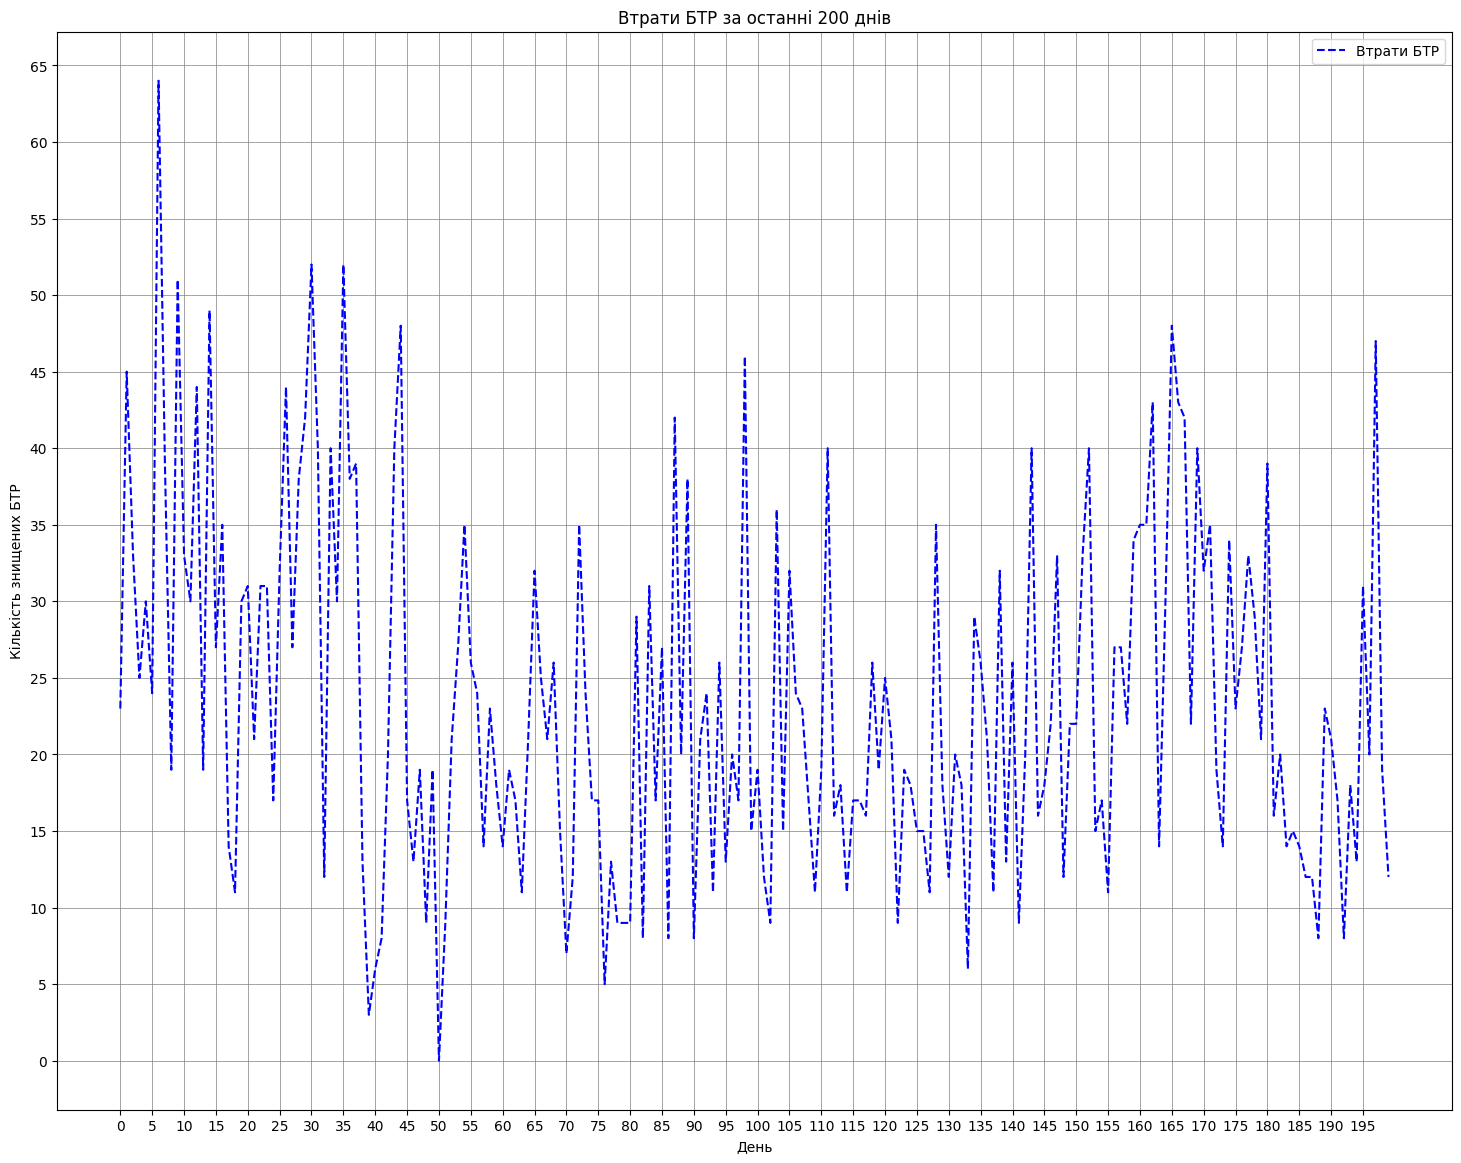

In [56]:
plot_losses_last_200_days(filename)